In [1]:
import numpy as np
import pandas as pd

import keras
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical
import tensorflow as tn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
print("TensorFlow: ",tn.__version__)
print("Numpy:",np.__version__)
print("Keras: ",keras.__version__)

TensorFlow:  1.4.0
Numpy: 1.13.3
Keras:  2.1.2


In [3]:
print(mnist)
for el in dir(mnist):
    print(el)

<module 'keras.datasets.mnist' from 'C:\\anaconda3\\lib\\site-packages\\keras\\datasets\\mnist.py'>
__builtins__
__cached__
__doc__
__file__
__loader__
__name__
__package__
__spec__
get_file
load_data
np


In [4]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [5]:
print("train_images {}".format(train_images.shape))
print("train_labels {}".format(train_labels.shape))
print("test_images {}".format(test_images.shape))
print("test_labels {}".format(test_labels.shape))


train_images (60000, 28, 28)
train_labels (60000,)
test_images (10000, 28, 28)
test_labels (10000,)


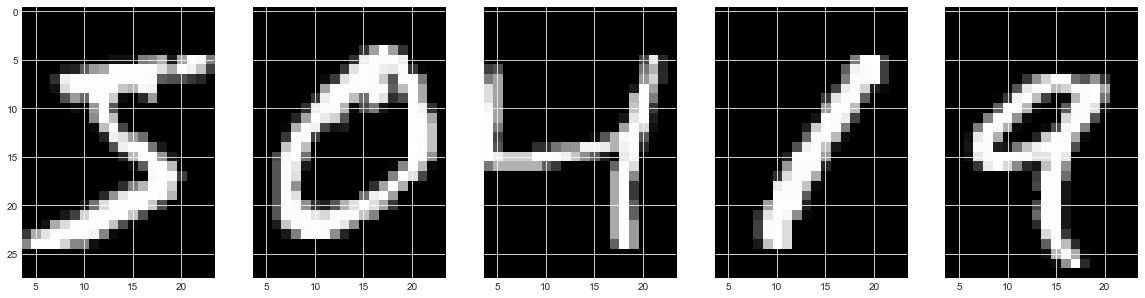

In [6]:
fig = plt.figure(figsize=(5,4))
f, (ax1, ax2, ax3,ax4,ax5) = plt.subplots(1, 5, figsize=(20, 5),sharey=True)
ax1.imshow(train_images[0],cmap='gray')
ax2.imshow(train_images[1],cmap='gray')
ax3.imshow(train_images[2],cmap='gray')
ax4.imshow(train_images[3],cmap='gray')
ax5.imshow(train_images[4],cmap='gray')


In [7]:
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
print(test_images[0])
print(test)

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

NameError: name 'test' is not defined

In [ ]:
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print(train_labels[0])

In [8]:
network = models.Sequential()
network.add(layers.Dense(512, activation="relu", input_shape=(28*28,)))
network.add(layers.Dense(10, activation="softmax"))

In [9]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [12]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

from keras.utils import plot_model
plot_model(network, to_file='model.png')

SVG(model_to_dot(network).create(prog='dot', format='svg'))

ImportError: Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.

In [44]:
network.compile(
        optimizer="rmsprop",
        loss="categorical_crossentropy",
        metrics = ["accuracy"]
)

In [45]:
print(network)

In [46]:
network.fit(
    train_images,train_labels,
epochs = 5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.2579 - acc: 0.9260
Epoch 2/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.1046 - acc: 0.9687
Epoch 3/5
60000/60000 [==============================] - 4s 60us/step - loss: 0.0694 - acc: 0.9790
Epoch 4/5
60000/60000 [==============================] - 4s 61us/step - loss: 0.0500 - acc: 0.9846
Epoch 5/5
60000/60000 [==============================] - 4s 67us/step - loss: 0.0380 - acc: 0.9887


In [47]:
test_loss,test_acc = network.evaluate(test_images,test_labels)

10000/10000 [==============================] - 0s 44us/step


In [48]:
print(test_loss,test_acc)

0.0714922183203 0.9787


In [54]:
print(test_images.shape)

(10000, 784)


In [89]:
test_images[0].shape

(784,)

In [85]:
test = np.reshape(test_images[0], (-1, 1))
#test_images.expand_dims(test_images, 1)
test.shape

(784, 1)

In [86]:
test = test.transpose()

In [87]:
print(test.shape)

(1, 784)


In [88]:
prediction = network.predict(test)
print(prediction)

[[ 0.07606775  0.11873724  0.09137673  0.07913981  0.09712248  0.19174127
   0.07836127  0.1140516   0.0641747   0.08922707]]
